In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *
from LazyLuna.Figures import *

In [2]:
# basepaths
bp        = '/Users/dietrichhadler/Desktop/Daten/LAX_Fett'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Edyta'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Imgs'

In [3]:
#parse_cvi42ws(bp_annos1, bp_annos1, process=True, debug=False)

In [6]:
lax_cine_view = LAX_CINE_View()
cases = []

# get the paths of imgs and annotations via SeriesInstanceUIDs
#imgp, annop = [(p1,p2) for p1,p2 in get_imgs_and_annotation_paths(bp_imgs, bp_annos1) if case_name in p1][0]
paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos1)

for imgp, annop in paths:
    try:
        print(imgp, annop)
        st = time()
        case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos1))

        case = lax_cine_view.initialize_case(case)
        case.store(bp_cases)
        cases.append(case)
        print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
    except Exception as e:
        print('Failed at: ', imgp, annop, ' , Exception: ', e)
    print()

/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Imgs/CMI_Dobu_PS_1954_062Y /Users/dietrichhadler/Desktop/Daten/LAX_Fett/Edyta/1.2.276.0.7230010.3.1.2.0.738.1612732490.783328
Case customization took:  10.711407899856567 Case:  Edyta CMI_Dobu_PS_1954_062Y

/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Imgs/MYKG109_030Y /Users/dietrichhadler/Desktop/Daten/LAX_Fett/Edyta/1.3.12.2.1107.5.2.30.26389.30000014020706192646800000006
Case customization took:  11.587536811828613 Case:  Edyta MYKG109_030Y

/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Imgs/BLV-MRT-5167971_V3_072Y /Users/dietrichhadler/Desktop/Daten/LAX_Fett/Edyta/1.3.12.2.1107.5.2.43.167071.30000021082505434774000000007
Case customization took:  6.585067987442017 Case:  Edyta BLV-MRT-5167971_V3_072Y

/Users/dietrichhadler/Desktop/Daten/LAX_Fett/Imgs/MYKG107_019Y /Users/dietrichhadler/Desktop/Daten/LAX_Fett/Edyta/1.3.12.2.1107.5.2.30.26389.30000014032806172825000000009
Failed at:  /Users/dietrichhadler/Desktop/Daten/LAX_Fett/Imgs/MYKG107

CMI_Dobu_PS_1954_062Y
Clinical Results
2CV ES Atrial Fat Area 2.3350448608398438
2CV ED Atrial Fat Area 4.71392822265625
4CV ES Atrial Fat Area 11.622360229492188
4CV ED Atrial Fat Area 13.050979614257812
2CV ES Epicardial Fat Area 24.998260498046875
2CV ED Epicardial Fat Area 19.150978088378906
4CV ES Epicardial Fat Area 14.24493408203125
4CV ED Epicardial Fat Area 14.264274597167969
2CV ES Pericardial Fat Area 30.21117401123047
2CV ED Pericardial Fat Area 23.862327575683594
4CV ES Pericardial Fat Area 61.77489471435547
4CV ED Pericardial Fat Area 55.190093994140625
LAX 4CV LVES


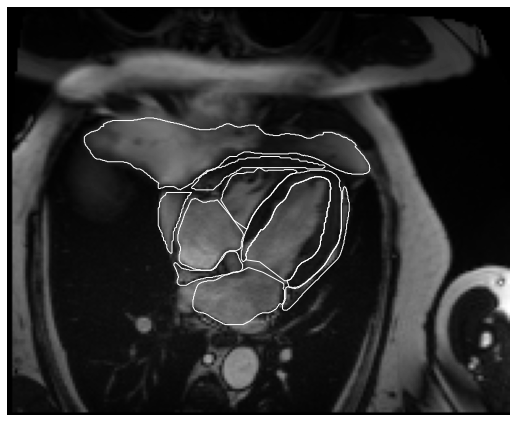

LAX 4CV LVED


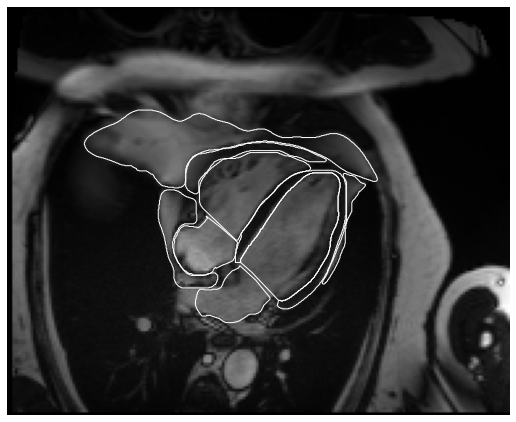

LAX 2CV LVES


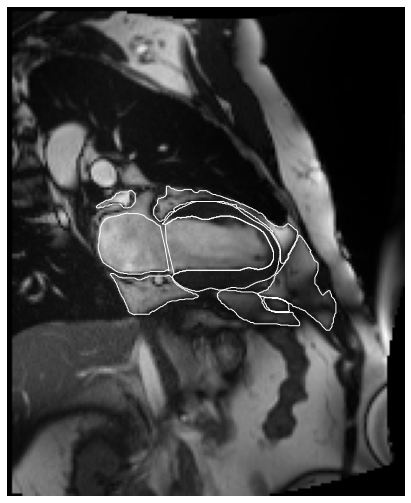

LAX 2CV LVED


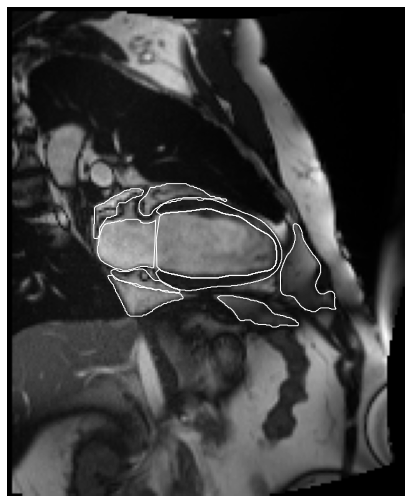


MYKG109_030Y
Clinical Results
2CV ES Atrial Fat Area 4.385291402318907
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 0.0
4CV ED Atrial Fat Area 0.0
2CV ES Epicardial Fat Area 0.5350545487522063
2CV ED Epicardial Fat Area 2.235273673450151
4CV ES Epicardial Fat Area 6.0933501541047965
4CV ED Epicardial Fat Area 2.591976705951622
2CV ES Pericardial Fat Area 5.477939427701159
2CV ED Pericardial Fat Area 5.782704930744999
4CV ES Pericardial Fat Area 2.1294387077629016
4CV ED Pericardial Fat Area 3.500393494767181
LAX 4CV LVES


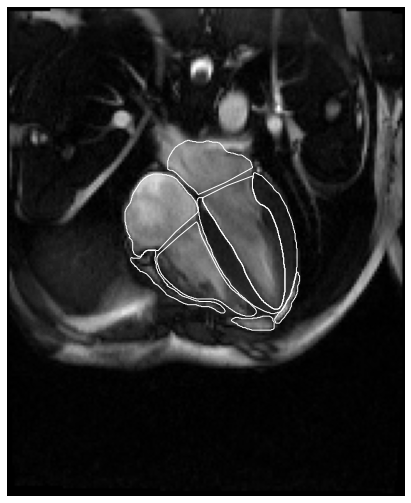

LAX 4CV LVED


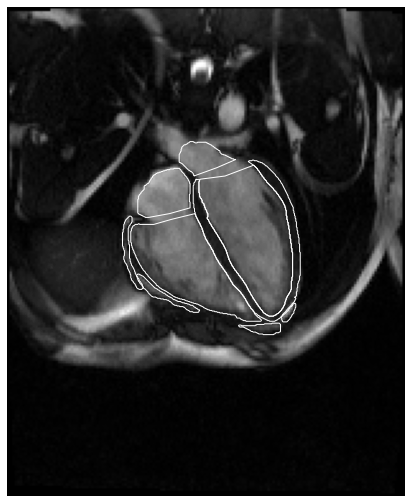

LAX 2CV LVES


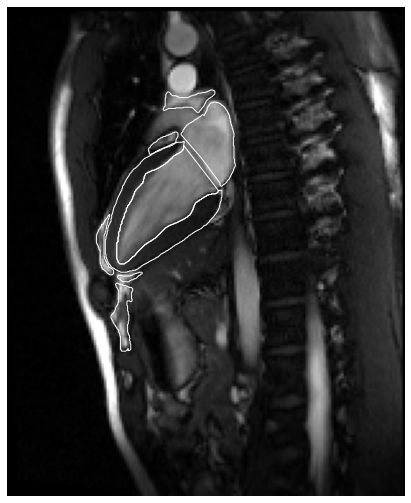

LAX 2CV LVED


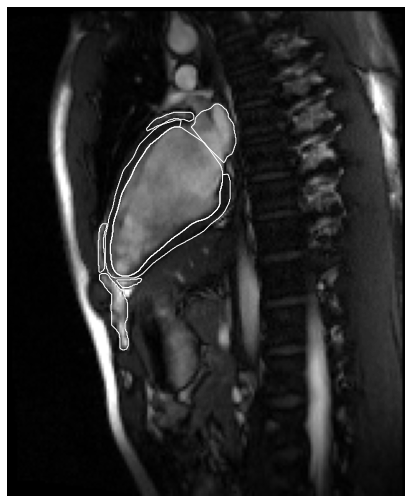


BLV-MRT-5167971_V3_072Y
Clinical Results
2CV ES Atrial Fat Area 0.0
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 2.6469178795154336
4CV ED Atrial Fat Area 3.129542022846638
2CV ES Epicardial Fat Area 7.668546941788561
2CV ED Epicardial Fat Area 9.745166741900512
4CV ES Epicardial Fat Area 8.303974230845737
4CV ED Epicardial Fat Area 8.643815106859233
2CV ES Pericardial Fat Area 4.698487983606733
2CV ED Pericardial Fat Area 4.609144067799745
4CV ES Pericardial Fat Area 24.082777754253666
4CV ED Pericardial Fat Area 22.796893358526926
LAX 4CV LVES


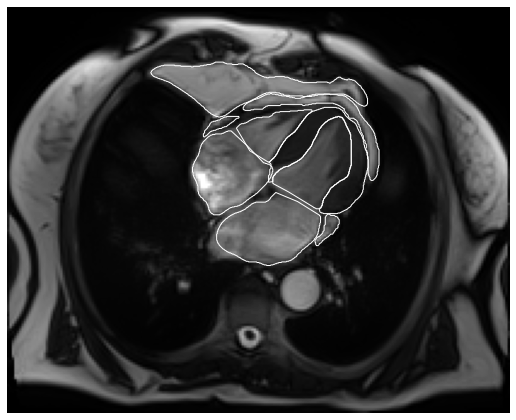

LAX 4CV LVED


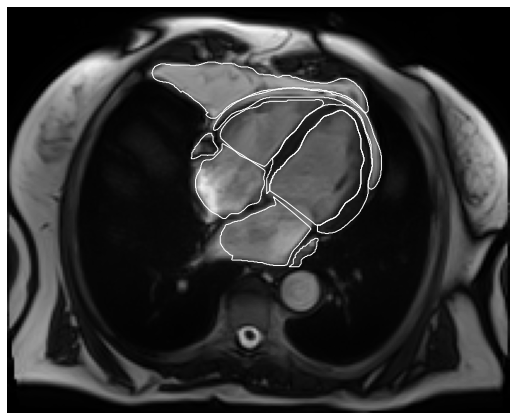

LAX 2CV LVES


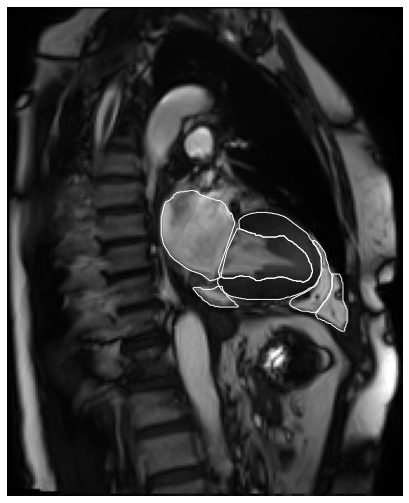

LAX 2CV LVED


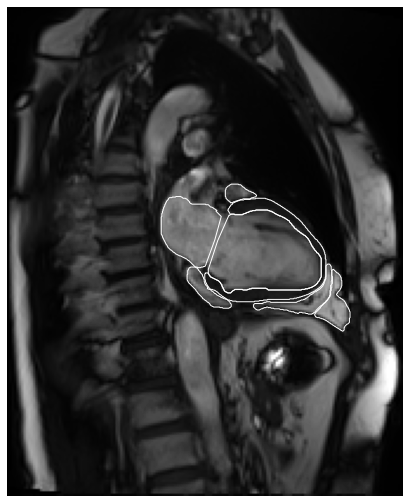


BLV-MRT-4838868_V3_082Y
Clinical Results
2CV ES Atrial Fat Area 0.0
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 5.756420145545551
4CV ED Atrial Fat Area 2.7863611873637226
2CV ES Epicardial Fat Area 6.0503365788545205
2CV ED Epicardial Fat Area 5.318885455051518
4CV ES Epicardial Fat Area 8.653834985267492
4CV ED Epicardial Fat Area 8.519401616623334
2CV ES Pericardial Fat Area 8.682224640757562
2CV ED Pericardial Fat Area 8.654669975134848
4CV ES Pericardial Fat Area 30.62158340551088
4CV ED Pericardial Fat Area 24.793354131372794
LAX 4CV LVES


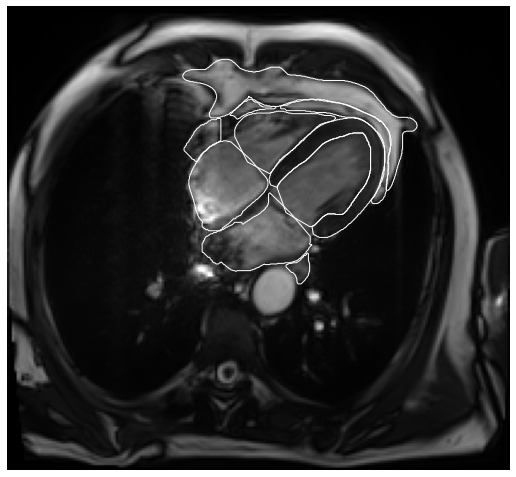

LAX 4CV LVED


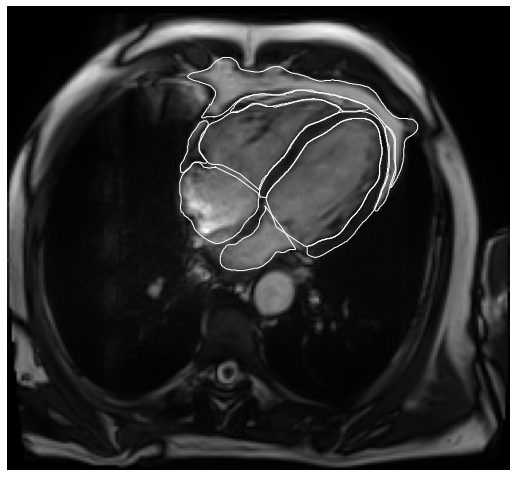

LAX 2CV LVES


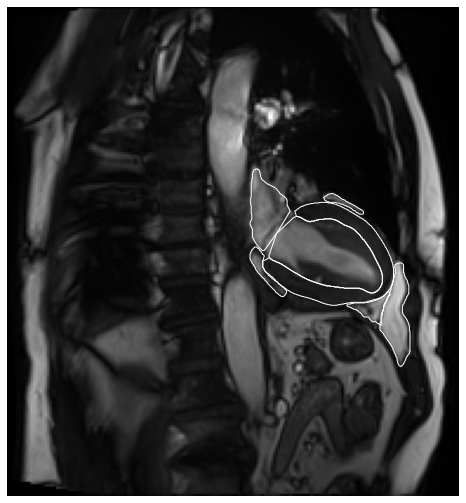

LAX 2CV LVED


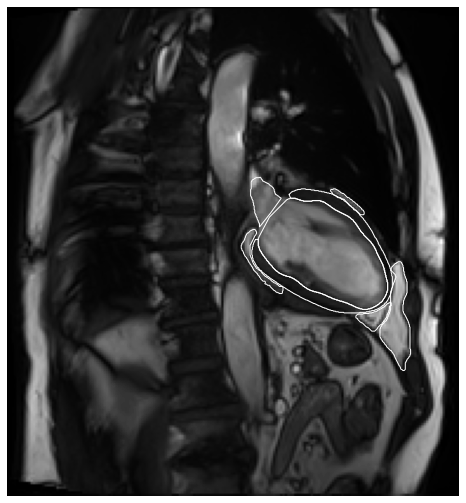


BLV-MRT-2436573_V3_062Y
Clinical Results
2CV ES Atrial Fat Area 9.953603631795579
2CV ED Atrial Fat Area 8.720356360819927
4CV ES Atrial Fat Area 12.619146993420538
4CV ED Atrial Fat Area 10.218642306030896
2CV ES Epicardial Fat Area 11.060280788118467
2CV ED Epicardial Fat Area 9.383497217932273
4CV ES Epicardial Fat Area 16.251816998041726
4CV ED Epicardial Fat Area 23.849268291208674
2CV ES Pericardial Fat Area 37.57509711409495
2CV ED Pericardial Fat Area 38.47839665029203
4CV ES Pericardial Fat Area 71.67112958492048
4CV ED Pericardial Fat Area 55.749260279377104
LAX 4CV LVES


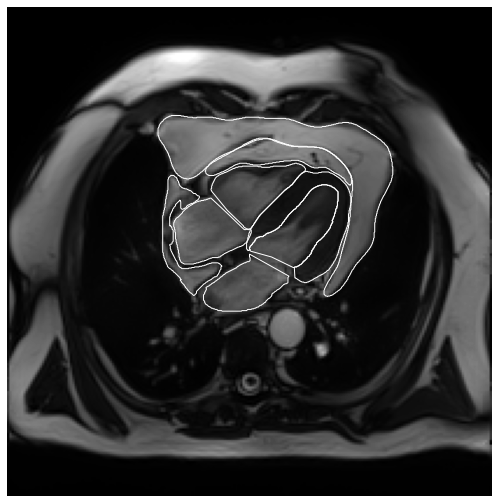

LAX 4CV LVED


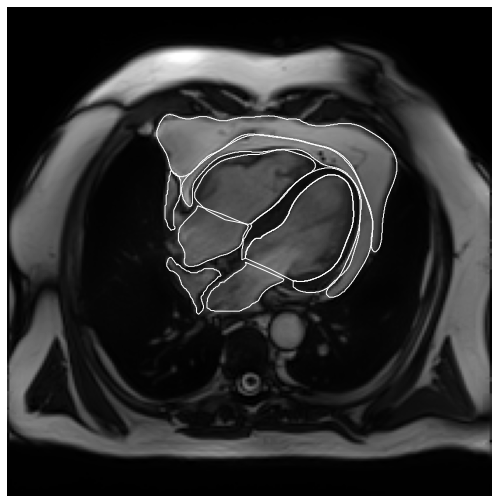

LAX 2CV LVES


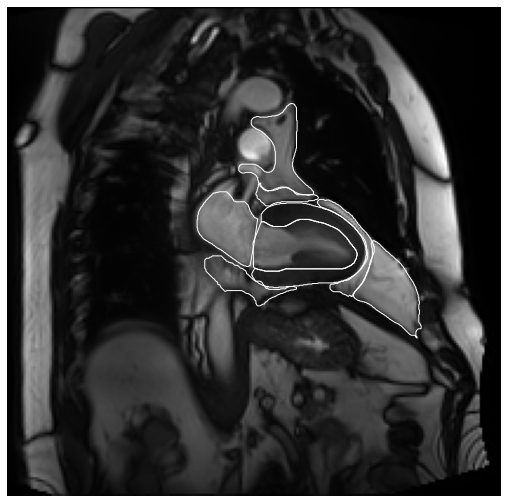

LAX 2CV LVED


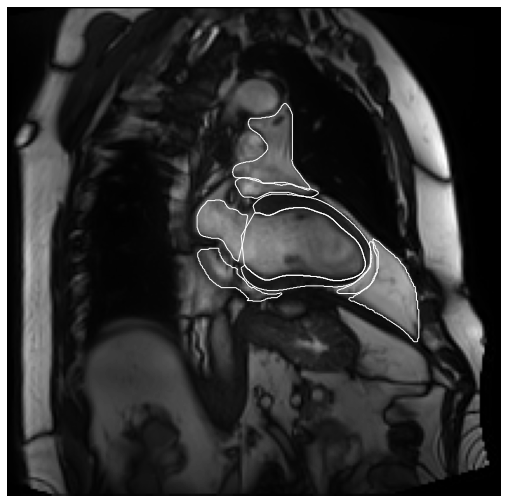


BLV-MRT-9237101_V3_059Y
Clinical Results
2CV ES Atrial Fat Area 5.32689191347693
2CV ED Atrial Fat Area 7.6175150879171785
4CV ES Atrial Fat Area 8.347253547135557
4CV ED Atrial Fat Area 10.552376030168746
2CV ES Epicardial Fat Area 14.281598047237049
2CV ED Epicardial Fat Area 16.24711975551325
4CV ES Epicardial Fat Area 28.391200517573854
4CV ED Epicardial Fat Area 22.20830749594021
2CV ES Pericardial Fat Area 11.805060578690757
2CV ED Pericardial Fat Area 10.755191623738977
4CV ES Pericardial Fat Area 38.10049996270556
4CV ED Pericardial Fat Area 38.26255359874452
LAX 4CV LVES


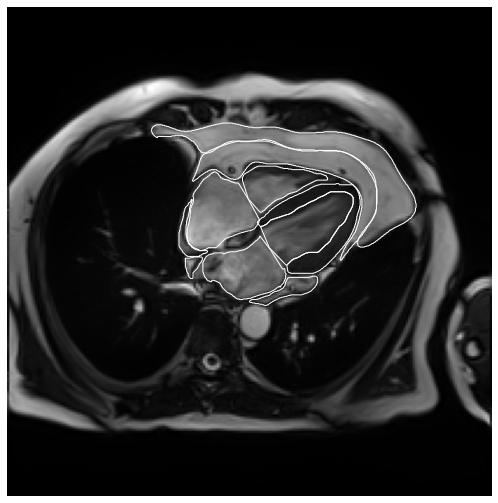

LAX 4CV LVED


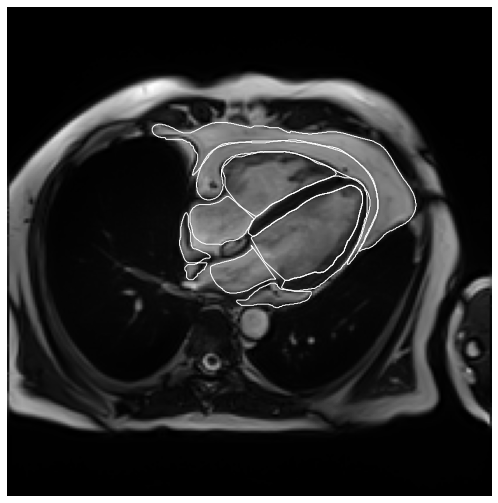

LAX 2CV LVES


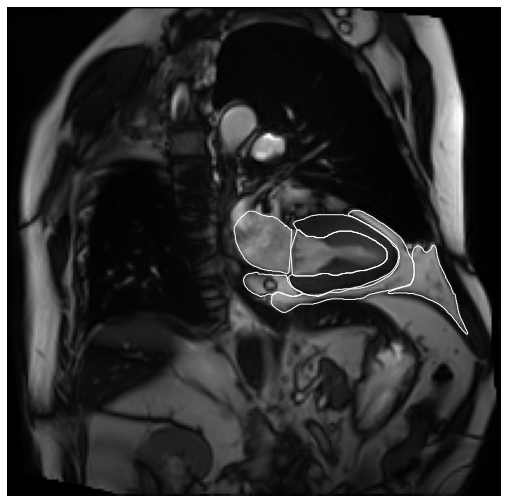

LAX 2CV LVED


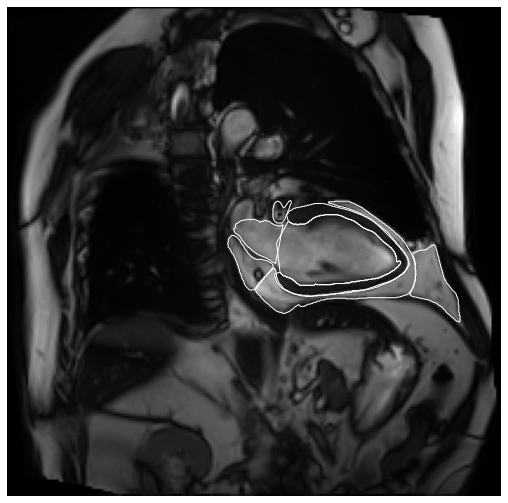


MYKG112_024Y
Clinical Results
2CV ES Atrial Fat Area 0.0
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 0.0
4CV ED Atrial Fat Area 0.0
2CV ES Epicardial Fat Area 3.790459697021124
2CV ED Epicardial Fat Area 3.690504451649833
4CV ES Epicardial Fat Area 4.587161799833475
4CV ED Epicardial Fat Area 3.9766508403598038
2CV ES Pericardial Fat Area 0.0
2CV ED Pericardial Fat Area 0.0
4CV ES Pericardial Fat Area 0.0
4CV ED Pericardial Fat Area 0.0
LAX 4CV LVES


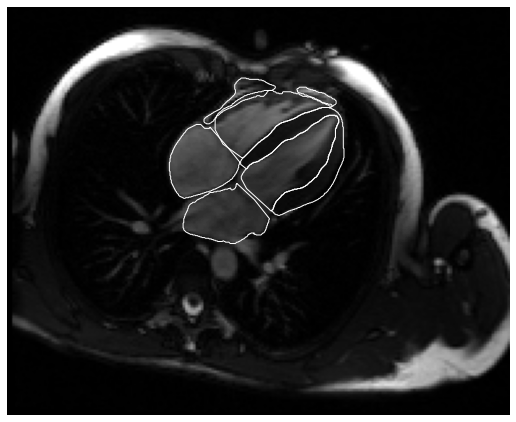

LAX 4CV LVED


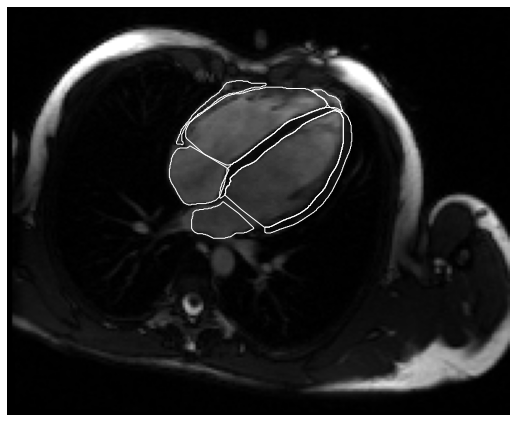

LAX 2CV LVES


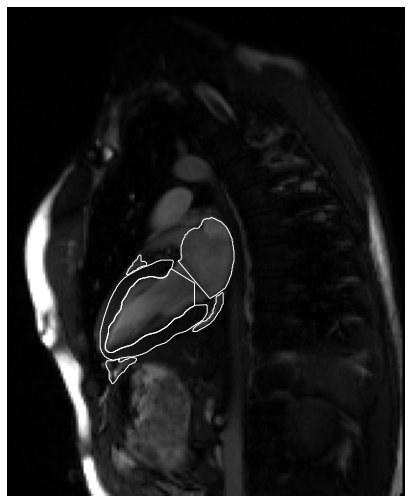

LAX 2CV LVED


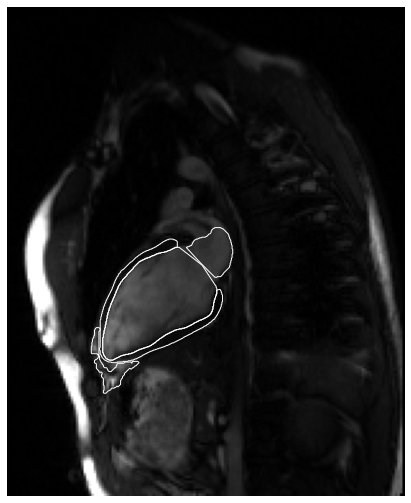


CMI_SM_1951_051Y
Clinical Results
2CV ES Atrial Fat Area 3.605248507068437
2CV ED Atrial Fat Area 6.879272769671223
4CV ES Atrial Fat Area 4.076606085731095
4CV ED Atrial Fat Area 5.724887680971408
2CV ES Epicardial Fat Area 2.0510424368834577
2CV ED Epicardial Fat Area 1.8276130648770417
4CV ES Epicardial Fat Area 13.593913370495613
4CV ED Epicardial Fat Area 9.927907753495607
2CV ES Pericardial Fat Area 0.0
2CV ED Pericardial Fat Area 0.0
4CV ES Pericardial Fat Area 24.46257637454455
4CV ED Pericardial Fat Area 21.079777286096537
LAX 4CV LVES


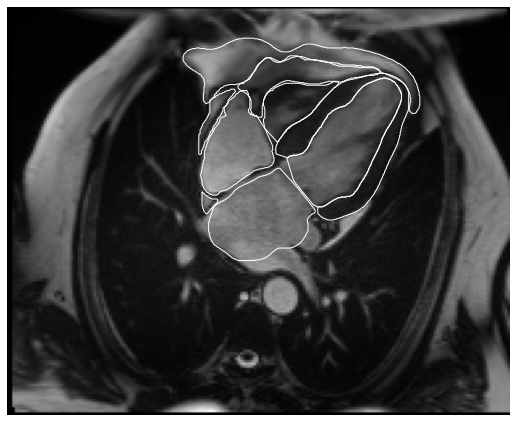

LAX 4CV LVED


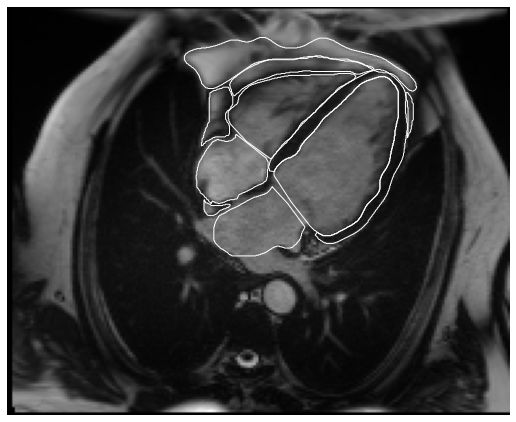

LAX 2CV LVES


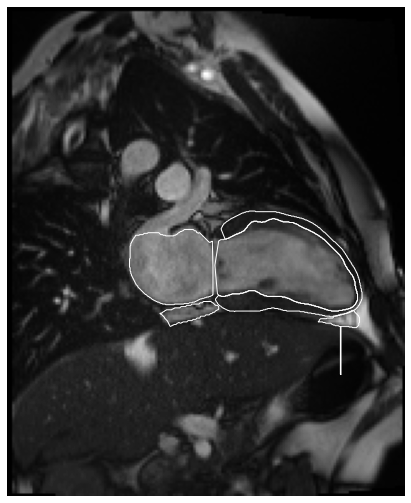

LAX 2CV LVED


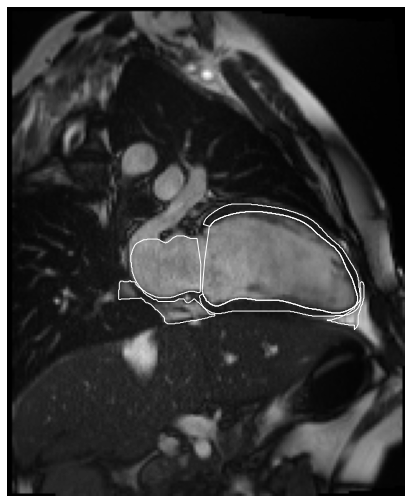


MYKG_111_055Y
Clinical Results
2CV ES Atrial Fat Area 4.794775876260393
2CV ED Atrial Fat Area 4.957580367335867
4CV ES Atrial Fat Area 4.074646178959109
4CV ED Atrial Fat Area 2.334248965435449
2CV ES Epicardial Fat Area 3.8681367804398366
2CV ED Epicardial Fat Area 4.385928507694916
4CV ES Epicardial Fat Area 14.7806369209332
4CV ED Epicardial Fat Area 10.239532930241399
2CV ES Pericardial Fat Area 0.0
2CV ED Pericardial Fat Area 0.0
4CV ES Pericardial Fat Area 12.567902175360889
4CV ED Pericardial Fat Area 8.214949234779752
LAX 4CV LVES


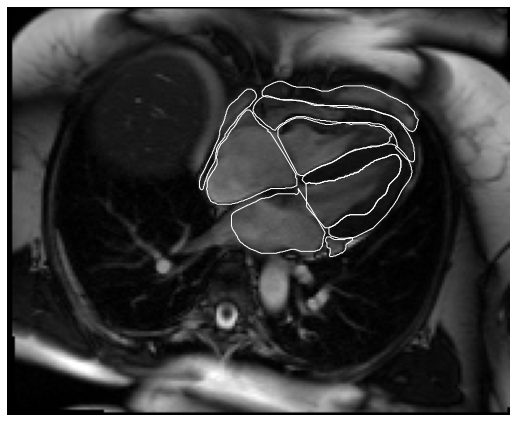

LAX 4CV LVED


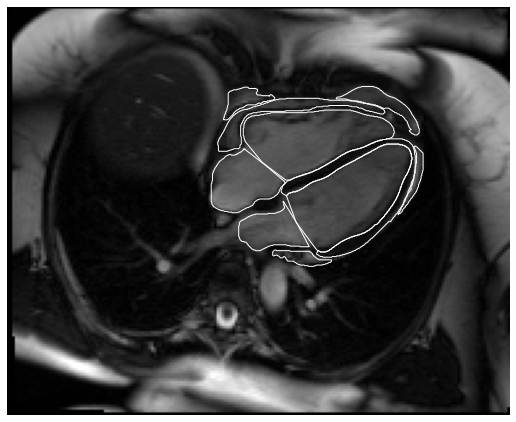

LAX 2CV LVES


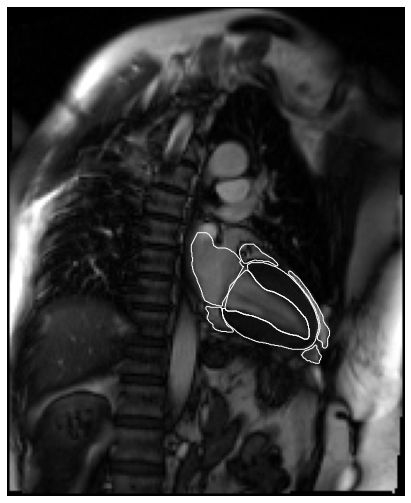

LAX 2CV LVED


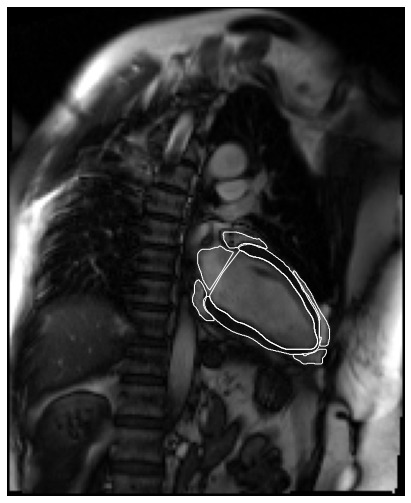


DP_73_130318_CMI_
Clinical Results
2CV ES Atrial Fat Area 14.245582372180992
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 0.0
4CV ED Atrial Fat Area 0.0
2CV ES Epicardial Fat Area 1.683559917136063
2CV ED Epicardial Fat Area 0.0
4CV ES Epicardial Fat Area 0.0
4CV ED Epicardial Fat Area 0.0
2CV ES Pericardial Fat Area 0.0
2CV ED Pericardial Fat Area 0.0
4CV ES Pericardial Fat Area 0.0
4CV ED Pericardial Fat Area 0.0
LAX 4CV LVES


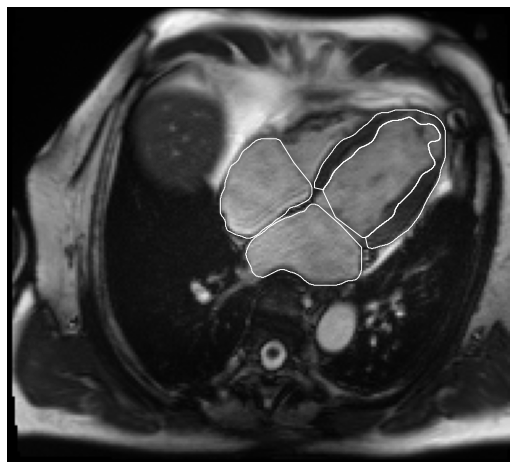

LAX 4CV LVED


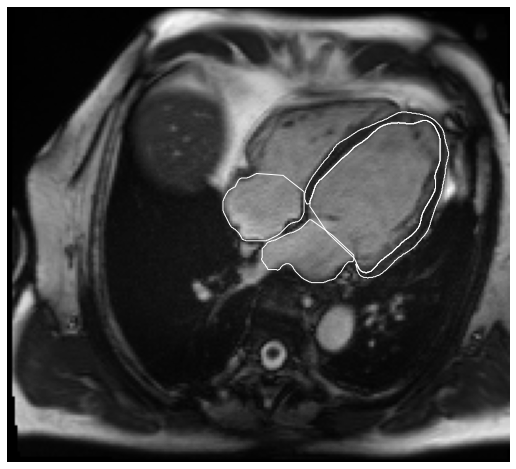

LAX 2CV LVES


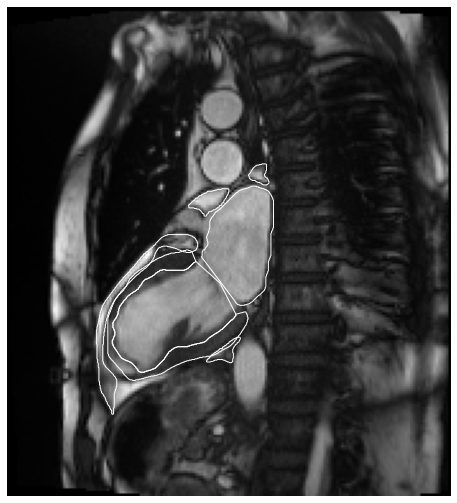

LAX 2CV LVED


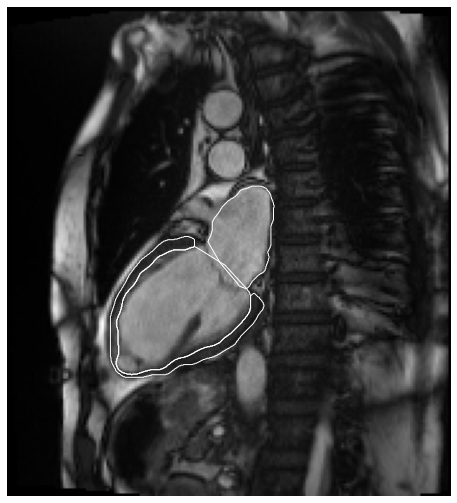


Embolische_Narbe_41J_
Clinical Results
2CV ES Atrial Fat Area 0.0
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 0.0
4CV ED Atrial Fat Area 0.0
2CV ES Epicardial Fat Area 4.85000190025093
2CV ED Epicardial Fat Area 1.6597285020546033
4CV ES Epicardial Fat Area 3.925122170961619
4CV ED Epicardial Fat Area 1.6887480077306847
2CV ES Pericardial Fat Area 4.715201615820099
2CV ED Pericardial Fat Area 4.932379851847549
4CV ES Pericardial Fat Area 13.945276646986704
4CV ED Pericardial Fat Area 10.543441691280877
LAX 4CV LVES


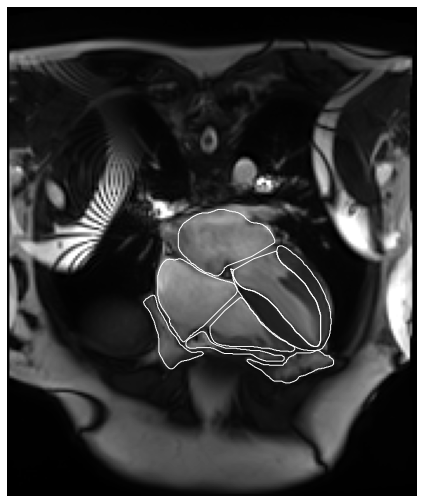

LAX 4CV LVED


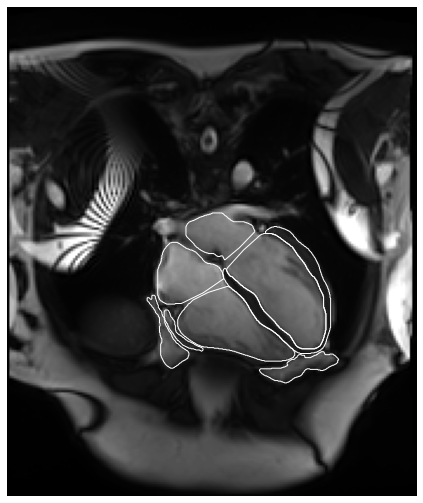

LAX 2CV LVES


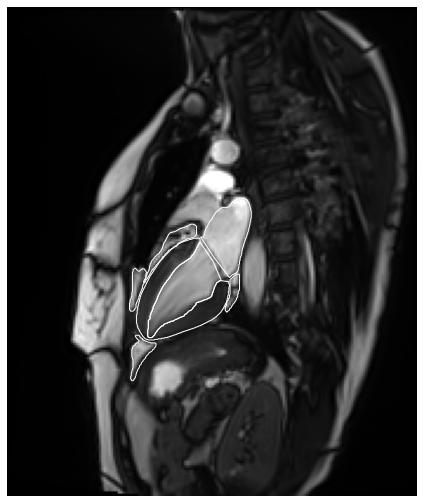

LAX 2CV LVED


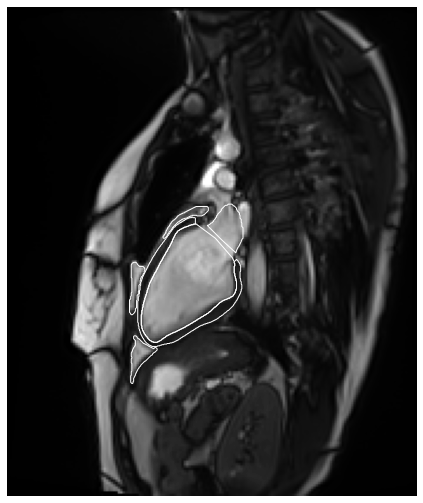


My_KG110_023Y
Clinical Results
2CV ES Atrial Fat Area 0.0
2CV ED Atrial Fat Area 0.0
4CV ES Atrial Fat Area 0.0
4CV ED Atrial Fat Area 1.8981697086685412
2CV ES Epicardial Fat Area 8.287465785343239
2CV ED Epicardial Fat Area 5.652371130407922
4CV ES Epicardial Fat Area 6.719540367754356
4CV ED Epicardial Fat Area 4.188320771734303
2CV ES Pericardial Fat Area 0.0
2CV ED Pericardial Fat Area 0.0
4CV ES Pericardial Fat Area 1.4219123630759183
4CV ED Pericardial Fat Area 2.1098396400430404
LAX 4CV LVES


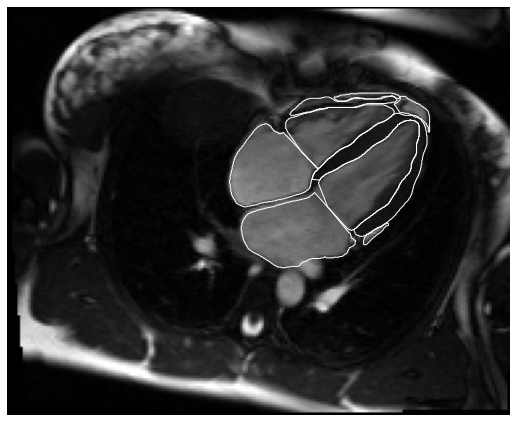

LAX 4CV LVED


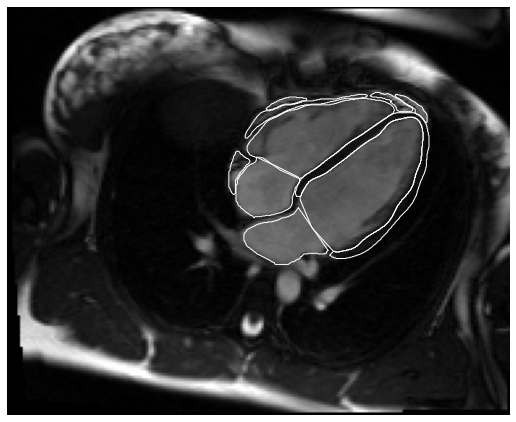

LAX 2CV LVES


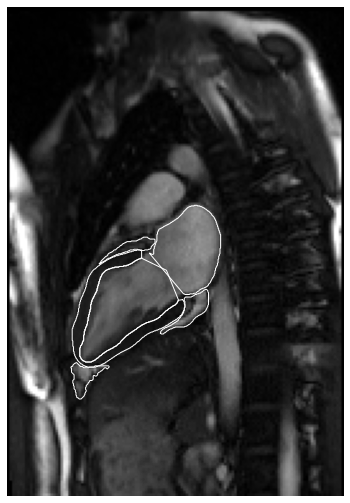

LAX 2CV LVED


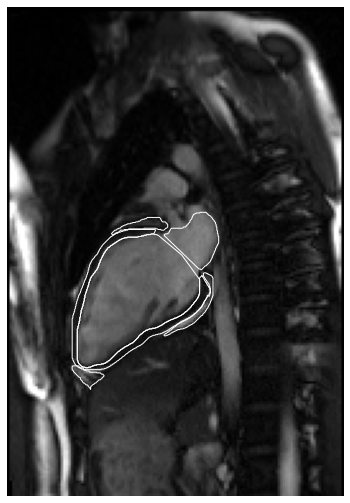

In [9]:
for case in cases:
    print(case.case_name)
    print('Clinical Results')
    case = lax_cine_view.customize_case(case)
    for cr in case.crs:
        if 'Fat Area' in cr.name:
            print(cr.name, cr.get_cr())

    cats = ['LAX 2CV LVES', 'LAX 2CV LVED', 'LAX 4CV LVES', 'LAX 4CV LVED']
    for cat in case.categories:
        if cat.name in cats:
            print(cat.name)
            fig, ax = plt.subplots(1,1,figsize=(9,9))
            img  = cat.get_img (0, cat.phase)
            anno = cat.get_anno(0, cat.phase)
            ax.imshow(img, cmap='gray'); ax.axis('off')
            anno.plot_all_contour_outlines(ax)
            plt.show()
    print()